In [23]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [2]:
donations_13to17=pd.read_pickle('donations_13to17.pkl')

In [3]:
for col in donations_13to17.columns:
    print(col)

id
cohort_yr
amount_total
amount_yr1
amount_yr2
amount_yr3
amount_yr4
amount_yr5
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
total_giving_years
max_consec_giving_years
count_total
count_2013
count_2014
count_2015
count_2016
count_2017
recovered_count
recovered_amount
lapsed_count
lapsed_amount
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_01_2013
amount_02_2013
amount_03_2013
amount_04_2013
amount_05_2013
amount_06_2013
amount_07_2013
amount_08_2013
amount_09_2013
amount_10_2013
amount_11_2013
amount_12_2013
amount_01_2014
amount_02_2014
amount_03_2014
amount_04_2014
amount_05_2014
amount_06_2014
amount_07_2014
amount_08_2014
amount_09_2014
amount_10_2014
amount_11_2014
amount_12_2014
amount_01_2015

In [4]:
donations_13to17.head()

,id,cohort_yr,amount_total,amount_yr1,amount_yr2,amount_yr3,amount_yr4,amount_yr5,amount_2013,amount_2014,...,amount_06_yr5,amount_07_yr5,amount_08_yr5,amount_09_yr5,amount_10_yr5,amount_11_yr5,amount_12_yr5,years_donated,perc_years_donated,donor_profile
0,1f4b5b6e68445c6c4a0509b3aca93f38,cohort15,120941.51,18211.38,40085.15,62644.98,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.6,repeat
1,4aaab6d244bf3599682239ed5591af8a,cohort16,25.00,25.00,0.00,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
2,0b0765dc9c759adc48a07688ba25e94e,cohort15,60.00,20.00,40.00,0.00,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat
3,377944ad61f72d800b25ec1862aec363,cohort16,25.00,25.00,0.00,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
4,6d5b22d39e68c656071a842732c63a0c,cohort15,95.00,70.00,25.00,0.00,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat


### Information about the donors

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000284E5DBDCC8>,
      dtype=object)

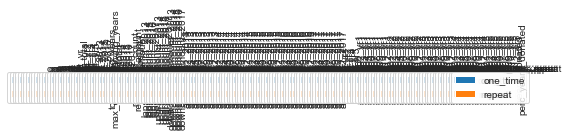

In [9]:
donations_13to17.groupby('donor_profile').count().plot(kind='pie', subplots=True, figsize=(8, 8))

In [72]:
typebycohort=donations_13to17.groupby(['cohort_yr', 'donor_profile'])['id'].count().reset_index()

In [76]:
typebycohort

,cohort_yr,donor_profile,id
0,cohort13,one_time,227826
1,cohort13,repeat,92276
2,cohort14,one_time,248002
3,cohort14,repeat,72673
4,cohort15,one_time,292542
5,cohort15,repeat,62599
6,cohort16,one_time,389060
7,cohort16,repeat,56538
8,cohort17,one_time,434994


In [87]:
c13=typebycohort[typebycohort['cohort_yr'].isin(['cohort13'])]
c14=typebycohort[typebycohort['cohort_yr'].isin(['cohort14'])]
c15=typebycohort[typebycohort['cohort_yr'].isin(['cohort15'])]
c16=typebycohort[typebycohort['cohort_yr'].isin(['cohort16'])]
c17=typebycohort[typebycohort['cohort_yr'].isin(['cohort17'])]

In [88]:
c13
#['donor_profile'].tolist()
#c1=col_one_list.query('cohort_yr=cohort13')

#col_two_list = typeofdonor_bycohort['id'].tolist()

,cohort_yr,donor_profile,id
0,cohort13,one_time,227826
1,cohort13,repeat,92276


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

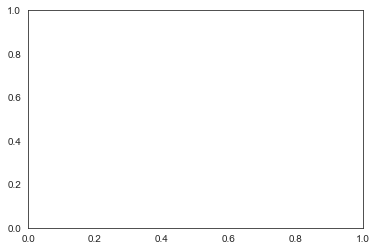

In [121]:
fig, axes = plt.subplots()

ax.plot(c13.donor_profile, c13.id)
ax.plot(c14.donor_profile, c14.id)

In [102]:
c13list=c13['donor_profile'].tolist()
c13list2=c13['id'].tolist()

In [104]:
fig = make_subplots(rows=1, cols=1,specs=[[{'type':'domain'}]])

fig.add_trace(go.pie(labels=c13list, values=c13list2), 1,1)

#fig.add_trace(go.pie(labels=c14.donor_profile, values=c14.id), 1,2)

#fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
#fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),
 #             1, 1)
#fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),
 #             1, 2)


#fig.add_trace(
#go.Scatter(donations_13to17.query('cohort_yr =cohort14').donor_profile, y=donations_13to17.query('cohort_yr =cohort14').amount_total),    row=1, col=2
#)

#fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

TypeError: 'module' object is not callable

In [37]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=typeofdonor_bycohort.cohort_yr, typeofdonor_bycohort.id),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=typeofdonor_bycohort.cohort_yr, typeofdonor_bycohort.id,
    row=1, col=2
)
    

#fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

SyntaxError: invalid syntax (<ipython-input-37-cc189128d47a>, line 15)

In [26]:
labels = typeofdonor_bycohort.donor_profile

values=typeofdonor_bycohort.id

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, name="cohort13"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values, name="cohort14"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Donor Type by Cohort",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

ValueError: 
The 'specs' argument to make_subplots must be a 2D list of dictionaries with dimensions (1 x 5).
    Received value of type <class 'list'>: [[{'type': 'domain'}, {'type': 'domain'}]]

In [18]:
fig = px.pie(donations_13to17.groupby('donor_profile').count().reset_index(), values='id', 
             names='donor_profile', title='Type of donor: 2013-2017'
            )
fig.show();

In [42]:
cohort13=pd.read_pickle('cohort13.pkl')
cohort14=pd.read_pickle('cohort14.pkl')
cohort15=pd.read_pickle('cohort15.pkl')
cohort16=pd.read_pickle('cohort16.pkl')
cohort17=pd.read_pickle('cohort17.pkl')

In [5]:
# number of donors per year (regardless of whether donor is new or old)
no_donors_13 = donations_13to17.query('amount_2013 > 0').count()['id']
no_donors_14 = donations_13to17.query('amount_2014 > 0').count()['id']
no_donors_15 = donations_13to17.query('amount_2015 > 0').count()['id']
no_donors_16 = donations_13to17.query('amount_2016 > 0').count()['id']
no_donors_17 = donations_13to17.query('amount_2017 > 0').count()['id']
no_donors_overall = donations_13to17.id.count()

In [8]:
no_donations_13 = donations_13to17['count_2013'].sum()
no_donations_14 = donations_13to17['count_2014'].sum()
no_donations_15 = donations_13to17['count_2015'].sum()
no_donations_16 = donations_13to17['count_2016'].sum()
no_donations_17 = donations_13to17['count_2017'].sum()
no_donations_overall = donations_13to17.count_total.sum()

In [9]:
amt_donated_13 = donations_13to17['amount_2013'].sum()
amt_donated_14 = donations_13to17['amount_2014'].sum()
amt_donated_15 = donations_13to17['amount_2015'].sum()
amt_donated_16 = donations_13to17['amount_2016'].sum()
amt_donated_17 = donations_13to17['amount_2017'].sum()
amt_donated_overall = donations_13to17.amount_total.sum()

In [10]:
avg_amt_per_donor_13 = amt_donated_13/no_donors_13
avg_amt_per_donor_14 = amt_donated_14/no_donors_14
avg_amt_per_donor_15 = amt_donated_15/no_donors_15
avg_amt_per_donor_16 = amt_donated_16/no_donors_16
avg_amt_per_donor_17 = amt_donated_17/no_donors_17
avg_amt_per_donor_overall = amt_donated_overall/no_donors_overall

In [11]:
max_amt_by_single_donor_13 = donations_13to17['amount_2013'].max()
max_amt_by_single_donor_14 = donations_13to17['amount_2014'].max()
max_amt_by_single_donor_15 = donations_13to17['amount_2015'].max()
max_amt_by_single_donor_16 = donations_13to17['amount_2016'].max()
max_amt_by_single_donor_17 = donations_13to17['amount_2017'].max()
max_amt_by_single_donor_overall = donations_13to17['amount_total'].max()

In [20]:
onetime_donors = donations_13to17[(donations_13to17['total_giving_years'] == 1)]

In [22]:
onetime_donors.shape

(1547304, 165)

In [17]:
repeat_donors = donations_13to17[(donations_13to17['total_giving_years'] > 1) ]

In [19]:
repeat_donors.shape

(329206, 165)

In [29]:
no_onetime_donors = len(onetime_donors.id.unique())
no_repeat_donors = len(repeat_donors.id.unique())
perc_onetime_donors= no_onetime_donors/no_donors_overall
perc_repeat_donors = no_repeat_donors/no_donors_overall

In [32]:
# number of new donors that year / number of donors per cohort class
no_new_donors_13 = donations_13to17.query('cohort_yr == "cohort13"').count()['id'] 
no_new_donors_14 = donations_13to17.query('cohort_yr == "cohort14"').count()['id'] 
no_new_donors_15 = donations_13to17.query('cohort_yr == "cohort15"').count()['id'] 
no_new_donors_16 = donations_13to17.query('cohort_yr == "cohort16"').count()['id'] 
no_new_donors_17 = donations_13to17.query('cohort_yr == "cohort17"').count()['id']  

In [33]:
# number of repeat/returning donors
no_repeat_donors_13 = no_donors_13-no_new_donors_13
no_repeat_donors_14 = no_donors_14-no_new_donors_14
no_repeat_donors_15 = no_donors_15-no_new_donors_15
no_repeat_donors_16 = no_donors_16-no_new_donors_16
no_repeat_donors_17 = no_donors_17-no_new_donors_17

In [35]:
#n/a not enough data  retention_rate_13 = no_repeat_donors_13/(no_repeat_donors_13+no_donors_lapsed_13)
retention_rate_14 = no_repeat_donors_14/(no_donors_13)
retention_rate_15 = no_repeat_donors_15/(no_donors_14)
retention_rate_16 = no_repeat_donors_16/(no_donors_15)
retention_rate_17 = no_repeat_donors_17/(no_donors_16)

In [53]:
no_donors_lapsed_14 = donations_13to17[(donations_13to17['amount_2013'] > 0) & (donations_13to17['amount_2014'] == 0)].count()['id']
no_donors_lapsed_15 = donations_13to17[(donations_13to17['amount_2014'] > 0) & (donations_13to17['amount_2015'] == 0)].count()['id']
no_donors_lapsed_16 = donations_13to17[(donations_13to17['amount_2015'] > 0) & (donations_13to17['amount_2016'] == 0)].count()['id']
no_donors_lapsed_17 = donations_13to17[(donations_13to17['amount_2016'] > 0) & (donations_13to17['amount_2017'] == 0)].count()['id']

In [58]:
#n/a not enough data no_donors_lapsed_13 = len(cohort14.query('lapsed_amount_2015 > 0'))
ano_donors_lapsed_14 = len(cohort13.query('lapsed_amount_2014 > 0'))
ano_donors_lapsed_15 = len(cohort14.query('lapsed_amount_2015 > 0'))
ano_donors_lapsed_16 = len(cohort15.query('lapsed_amount_2016 > 0'))
ano_donors_lapsed_17 = len(cohort16.query('lapsed_amount_2017 > 0'))

In [62]:
print(no_donors_lapsed_17)
print(ano_donors_lapsed_17)

456148
389060


In [36]:
print(f'One-time donors')
print(f'Count: ', f'{onetime_donors.id.count():,.0f}')
print(f'% total count: ', f'{onetime_donors.id.count()/no_donors_overall:.2%}')
print(f'Amount donated: ', f'$', f'{onetime_donors.amount_total.sum():,.0f}')
print(f'% total amount: ', f'{onetime_donors.amount_total.sum()/amt_donated_overall:.2%}')

One-time donors
Count:  1,547,304
% total count:  82.46%
Amount donated:  $ 110,766,706
% total amount:  42.95%


In [37]:
print(f'Repeat donors')
print(f'Count: ', f'{repeat_donors.id.count():,.0f}')
print(f'% total count: ', f'{repeat_donors.id.count()/no_donors_overall:.2%}')
print(f'Amount donated: ', f'$', f'{repeat_donors.amount_total.sum():,.0f}')
print(f'% total amount: ', f'{repeat_donors.amount_total.sum()/amt_donated_overall:.2%}')

Repeat donors
Count:  329,206
% total count:  17.54%
Amount donated:  $ 147,135,191
% total amount:  57.05%


In [28]:
# 1. Overview stats - 2013-2017
print(f'Overview overall 2013-2017')
print(f'# donors:', f'{no_donors_overall:,}')
print(f'# one-time donors:', f'{no_onetime_donors:,}')
print(f'% one-time donors:', f'{perc_onetime_donors:.0%}')
print(f'# repeat donors:', f'{no_repeat_donors:,}')
print(f'% repeat donors:', f'{perc_repeat_donors:.0%}')
print(f'# donations:', f'{no_donations_overall:,}')
print(f'$ donated:', f'$', f"{amt_donated_overall:,.2f}")
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_overall:,.2f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_overall:,.2f}')

Overview overall 2013-2017
# donors: 1,876,510
# one-time donors: 1,547,304
% one-time donors: 82%
# repeat donors: 329,206
% repeat donors: 18%
# donations: 4,251,760
$ donated: $ 257,901,896.76
Average $ per donor: $ 137.44
Max $ by single donor: $ 1,836,958.08


In [47]:
for col in donations_13to17.columns:
    print(col)

id
cohort_yr
amount_total
amount_yr1
amount_yr2
amount_yr3
amount_yr4
amount_yr5
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
total_giving_years
max_consec_giving_years
count_total
count_2013
count_2014
count_2015
count_2016
count_2017
recovered_count
recovered_amount
lapsed_count
lapsed_amount
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_01_2013
amount_02_2013
amount_03_2013
amount_04_2013
amount_05_2013
amount_06_2013
amount_07_2013
amount_08_2013
amount_09_2013
amount_10_2013
amount_11_2013
amount_12_2013
amount_01_2014
amount_02_2014
amount_03_2014
amount_04_2014
amount_05_2014
amount_06_2014
amount_07_2014
amount_08_2014
amount_09_2014
amount_10_2014
amount_11_2014
amount_12_2014
amount_01_2015

In [63]:
# 2a. By year - 2013
print(f'Year 1 - 2013')
print(f'# donors:', f'{no_donors_13:,}')
print(f'# new donors:', f'{no_new_donors_13:,}')
print(f'# repeat donors:', f'{no_repeat_donors_13:,}')
#print(f'# donors lapsed:', f'n/a')
print(f'Retention rate:', f'n/a')

print(f'$ donated:', f'$', f"{amt_donated_13:,.0f}")
print(f'# donations:', f'{no_donations_13:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_13:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_13:,.0f}')

Year 1 - 2013
# donors: 320,102
# new donors: 320,102
# repeat donors: 0
Retention rate: n/a
$ donated: $ 30,428,185
# donations: 573,983
Average $ per donor: $ 95
Max $ by single donor: $ 442,794


In [64]:
#2b. By year - 2014
print(f'Year 2 - 2014')
print(f'# donors:', f'{no_donors_14:,}')
print(f'# new donors:', f'{no_new_donors_14:,}')
print(f'# repeat donors:', f'{no_repeat_donors_14:,}')
#print(f'# donors lapsed:', f'{no_donors_lapsed_14:,}')
print(f'Retention rate:', f'{no_repeat_donors_14/no_donors_14:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_14:,.0f}")
print(f'# donations:', f'{no_donations_14:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_14:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_14:,.0f}')

Year 2 - 2014
# donors: 382,817
# new donors: 320,675
# repeat donors: 62,142
Retention rate: 16.23%
$ donated: $ 41,461,218
# donations: 746,608
Average $ per donor: $ 108
Max $ by single donor: $ 570,162


In [65]:
#2c. By year - 2015
print(f'Year 3 - 2015')
print(f'# donors:', f'{no_donors_15:,}')
print(f'# new donors:', f'{no_new_donors_15:,}')
print(f'# repeat donors:', f'{no_repeat_donors_15:,}')
#print(f'# donors lapsed:', f'{no_donors_lapsed_15:,}')
print(f'Retention rate:', f'{no_repeat_donors_15/no_donors_15:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_15:,.0f}")
print(f'# donations:', f'{no_donations_15:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_15:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_15:,.0f}')

Year 3 - 2015
# donors: 446,048
# new donors: 355,141
# repeat donors: 90,907
Retention rate: 20.38%
$ donated: $ 50,488,301
# donations: 783,362
Average $ per donor: $ 113
Max $ by single donor: $ 346,566


In [66]:
#2d. By year - 2016')
print(f'Year 4 - 2016')
print(f'# donors:', f'{no_donors_16:,}')
print(f'# new donors:', f'{no_new_donors_16:,}')
print(f'# repeat donors:', f'{no_repeat_donors_16:,}')
print(f'# donors lapsed:', f'{no_donors_lapsed_16:,}')
print(f'Retention rate:', f'{no_repeat_donors_16/no_donors_16:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_16:,.0f}")
print(f'# donations:', f'{no_donations_16:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_16:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_16:,.0f}')

Year 4 - 2016
# donors: 555,843
# new donors: 445,598
# repeat donors: 110,245
# donors lapsed: 365,597
Retention rate: 19.83%
$ donated: $ 62,652,159
# donations: 957,265
Average $ per donor: $ 113
Max $ by single donor: $ 294,947


In [67]:
#2e. By year - 2017
print(f'Year 5 - 2017')
print(f'# donors:', f'{no_donors_17:,}')
print(f'# new donors:', f'{no_new_donors_17:,}')
print(f'# repeat donors:', f'{no_repeat_donors_17:,}')
print(f'# donors lapsed:', f'{no_donors_lapsed_17:,}')
print(f'Retention rate:', f'{no_repeat_donors_17/no_donors_17:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_17:,.0f}")
print(f'# donations:', f'{no_donations_17:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_17:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_17:,.0f}')

Year 5 - 2017
# donors: 574,599
# new donors: 434,994
# repeat donors: 139,605
# donors lapsed: 456,148
Retention rate: 24.30%
$ donated: $ 72,872,034
# donations: 1,190,542
Average $ per donor: $ 127
Max $ by single donor: $ 634,710
